In [1]:
import numpy as np
import math as mt
import random as rd
import permute as pm

In [2]:
import fabian_bruteForce as bf

# Generate adjacency matrix for testing purposes
def genAdjMat(nNodes, symmetric = False): 
    print(nNodes)
    if not symmetric:
        adj_mat = np.array([[float(rd.randint(1,100)) for x in range(nNodes)] for x in range(nNodes)])
        for idx in range(len(adj_mat)):
            adj_mat[idx,idx] = np.inf
    else:
        adj_mat = np.zeros([nNodes,nNodes])
        for idx1 in range(nNodes):
            for idx2 in range(idx1+1,nNodes):
                val = float(rd.randint(1,100))
                adj_mat[idx1,idx2] = val
                adj_mat[idx2,idx1] = val
            adj_mat[idx1,idx1] = np.inf        
    return adj_mat

In [7]:
# mat = np.array([[np.inf, 63., 15., 95., 80.,  6.,  7.],
#                [63., np.inf, 48., 76., 89., 93., 17.],
#                [15., 48., np.inf,  2., 33., 65., 32.],
#                [95., 76.,  2., np.inf, 45.,  9., 58.],
#                [80., 89., 33., 45., np.inf, 99., 86.],
#                [ 6., 93., 65.,  9., 99., np.inf,  2.],
#                [ 7., 17., 32., 58., 86.,  2., np.inf]])


mat = genAdjMat(9,symmetric=True)

print("Adjacency matrix:")
print(mat)  
print()

a1,b1,c1 = bf.bruteForce(mat,symmetric=True,timed=True)
print("Lowest Cost: ",a1)
print("With path:   ",b1)


a2,b2,c2 = bf.bruteForce(mat,timed=True)
print("Lowest Cost: ",a2)
print("With path:   ",b2)

9
Adjacency matrix:
[[inf 51. 36. 57. 84. 24. 27. 69. 16.]
 [51. inf 13. 65. 55. 80. 70. 25. 55.]
 [36. 13. inf 55. 60. 96.  4. 42. 48.]
 [57. 65. 55. inf 73. 53. 93. 66. 97.]
 [84. 55. 60. 73. inf 21. 32. 74. 74.]
 [24. 80. 96. 53. 21. inf 31. 90. 27.]
 [27. 70.  4. 93. 32. 31. inf 68. 92.]
 [69. 25. 42. 66. 74. 90. 68. inf 34.]
 [16. 55. 48. 97. 74. 27. 92. 34. inf]]

Lowest Cost:  255.0
With path:    [0 3 5 4 6 2 1 7 8 0]
Lowest Cost:  255.0
With path:    [0 3 5 4 6 2 1 7 8 0]


In [12]:
res = [[[bf.bruteForce(mat,symmetric=False, timed = True)[2], 
         bf.bruteForce(mat,symmetric=True,  timed = True)[2]] 
        for mat in [genAdjMat(idx,symmetric=True)]][0] 
       for idx in (np.arange(3,11))] 


3
4
5
6
7
8
9
10


In [13]:
res

[[0.0004966259002685547, 0.0],
 [0.0009980201721191406, 0.0004987716674804688],
 [0.00099945068359375, 0.0009975433349609375],
 [0.005990505218505859, 0.005999565124511719],
 [0.007984399795532227, 0.0039920806884765625],
 [0.05639457702636719, 0.02694988250732422],
 [0.40123653411865234, 0.21060919761657715],
 [3.6442244052886963, 2.1445116996765137]]

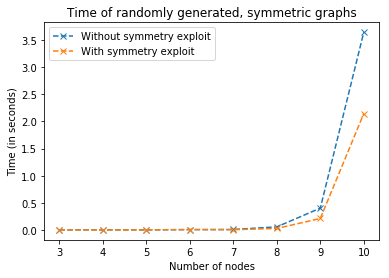

In [14]:
from matplotlib import pyplot as plt
plt.title("Time of randomly generated, symmetric graphs")
plt.plot(np.arange(len(res))+3,np.array(res),'--x')
plt.legend(['Without symmetry exploit','With symmetry exploit'])
plt.xlabel("Number of nodes")
plt.ylabel("Time (in seconds)")
plt.show()

In [11]:
import itertools

allpaths = iter((itertools.permutations(range(5))))
next(allpaths)
next(allpaths)

(0, 1, 2, 4, 3)

In [17]:
list(next(allpaths))

[0, 2, 1, 4, 3]